<a href="https://colab.research.google.com/github/Qtzaguzman/tareas-metodos-computacionales/blob/main/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

# El algoritmo EM

EM significa "Esperanza-Maximización", lo que indica los dos pasos del algoritmo, E y M.

La idea básica tras el algoritmo EM es como sigue. Se observan datos que se representan como $Y$ y hay algunos datos perdidos que se representan como $Z$. Juntos los datos obervados y perdidos son los datos completos $X=\left(Z,Y\right)$.

1\. Suponer que los datos completos tienen densidad $g(y,z\mid\theta)$ que está parametrizado por el vector de parámetros $\theta$. Dado que se tienen datos perdidos no es posible evaluar $g$.

2\. Los datos observados tienen la densidad
$$
f(y\mid\theta)=\int g(y,z\mid\theta)dz
$$
y la log-verosimilitud dados los los datos observados es $l(\theta\mid y)=\log f(y\mid\theta)$.

3\. El problema ahora es que es difícil evaluar o maximizar $l(\theta\mid y)$ debido a la integral. No obstante, para calcular la estimación de máxima verosimilitud de $\theta$ es necesario maximizar $l(\theta\mid y)$.

4\. La densidad de los datos completos generalmente corresponde a una distribución conocida que es fácil evaluar.

Dado lo anterior, el algoritmo EM fuciona de la manera siguiente:

1\. Paso **E**: Sea $\theta^{(t)}$ el estimador actual de $\theta$. Defínase
$$
Q(\theta\mid\theta^{(t)})=\mathbb{E}\left[\log g(y,z\mid\theta)\mid y, \theta^{(t)} \right]
$$

2\. Paso **M**: Maximizar $Q(\theta\mid\theta^{(t)})$ con respecto a $\theta$ para obtener el próximo valor $\theta^{(t+1)}$ tal que
$$
Q(\theta^{(t+1)}\mid\theta^{(t)})\geq Q(\theta\mid\theta^{(t)}),\quad\forall\theta\in\Theta
$$

3\. Ir a 1 si no se ha alcanzado la convergencia; esto es, cuando $\vert l(\theta^{(t)}\mid y)-l(\theta^{(t+1)}\mid y)\vert \leq\delta, \delta>0$.

En el paso E, el valor esperado es tomado con respecto a la distribución de los datos perdidos, cuya densidad es
$$
h(z\mid y,\theta)= g(y,z\mid\theta)/f(y\mid\theta)
$$

Dado que no se conoce $\theta$, podemos utilizar $\theta^{(t)}$ para evaluar la densidad de los datos perdidos. En particular, es de ayuda que $\log g(y,z\mid\theta)$ sea lineal en los estadisíticos suficientes de modo que tomar el valor esperado es una operación simple.

**Ejemplo**: Muestra normal univariada

Sea el vector de datos completos $\mathbf{y}=\left(y_1,\ldots,y_n\right)^T$ una muestra aleatoria de $N(\mu,\sigma^2)$. Entonces,
\begin{eqnarray}
f(\mathbf{y}\mid\mu,\sigma^2)&=&\left(\frac{1}{2\pi\sigma^2}\right)^{n/2}\exp\left\{-\frac{1}{2}\sum_{i=1}^n\frac{\left(y_i-\mu\right)^2}{\sigma^2}\right\}\\
&=&\left(\frac{1}{2\pi\sigma^2}\right)^{n/2}\exp\left\{-1/2\sigma^2\left(\sum y_i^2-2\mu\sum y_i+n\mu^2\right)\right\}
\end{eqnarray}
lo cual implica que $\left(\sum _i y_i,\sum y_i^2\right)$ son estadísticos suficientes para $\boldsymbol{\theta}=\left(\mu,\sigma^2\right)$. La log-verosimilitud con los datos completos es
$$
l(\mu,\sigma^2\mid \mathbf{y})=-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^ny_i^2+\frac{\mu}{\sigma^2}\sum_{i=1}^n y_i-\frac{n\mu^2}{2\sigma^2}+constante
$$
Se sigue que la log-verosimilitud basada en los datos completos es lineal en los estadísticos suficientes. Suponer que $y_i$, $i=1,\ldots,m$ son observados y $y_i$, $i=m+1,...,n$ son pérdidos donde $y_i$, $i=1,\ldots,n$, son $iid\,N(\mu,\sigma^2)$. Denótese el vector de datos observados por $\mathbf{y}_{obs}=\left(y_1,\ldots,y_m\right)^T$. Así, el paso E requiere el cómputo de
$$
\mathbb{E}\left(\sum_{i=1}^ny_i\mid \mathbf{y}_{obs},\boldsymbol{\theta}\right)\,\text{y}\,\mathbb{E}\left(\sum_{i=1}^ny_i^2\mid \mathbf{y}_{obs},\boldsymbol{\theta}\right)
$$
Entonces, en la $t-ésima$ iteración del paso E, se calculan

\begin{eqnarray}
s_1^{(t)}&=&\mathbb{E}\left(\sum_{i=1}^n y_i\mid\mathbf{y}_{obs},\mu^{(t)},\sigma^{2(t)}\right)\\
&=&\sum_{i=1}^m y_i+\mathbb{E}\left(\sum_{i=m+1}^n y_i\mid\mathbf{y}_{obs},\mu^{(t)},\sigma^{2(t)}\right)\\
&=&\sum_{i=1}^m y_i+(n-m)\mu^{(t)}
\end{eqnarray}

y

\begin{eqnarray}
s_2^{(t)}&=&\mathbb{E}\left(\sum_{i=1}^n y_i^2\mid\mathbf{y}_{obs},\mu^{(t)},\sigma^{2(t)}\right)\\
&=&\sum_{i=1}^m y_i^2+\mathbb{E}\left(\sum_{i=m+1}^n y_i^2\mid\mathbf{y}_{obs},\mu^{(t)},\sigma^{2(t)}\right)\\
&=&\sum_{i=1}^m y_i^2+(n-m)\left(\sigma^{2(t)}+\mu^{(t)2}\right)
\end{eqnarray}

De lo anterior, la cantidad $Q$ está dada por

\begin{eqnarray}
Q(\mu,\sigma^2\mid\mu^{(t)},\sigma^{2(t)})&=&-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}s_2^{(t)}+\frac{\mu}{\sigma^2}s_1^{(t)}-\frac{n\mu^2}{2\sigma^2}+constante\\
&=&-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\left(s_2^{(t)}-2\mu s_1^{(t)} +n\mu^2\right)+constante
\end{eqnarray}

Resolviendo simultáneamente

$$
\frac{d}{d\mu}Q(\mu,\sigma^2\mid\mu^{(t)},\sigma^{2(t)})=0\,\mathrm{y}\,\frac{d}{d\sigma^2}Q(\mu,\sigma^2\mid\mu^{(t)},\sigma^{2(t)})=0
$$

se tiene que
$$
\mu^{(t+1)}=\frac{s_1^{(t)}}{n}\quad\mathrm{y}\quad\sigma^{2(t+1)}=\frac{s_2^{(t)}}{n}-\left(\mu^{(t+1)}\right)^2
$$
En este caso no es necesario el algoritmo pues $\mu^{(t+1)}$ y $\sigma^{2(t+1)}$ convergen a los estimadores de máxima verosimilitud dados los datos observados,
$\hat\mu=\sum_i^m y_i/m$ y $\hat\sigma^2=\sum_i^m y_i^2/m-\hat\mu^2$.

En efecto,

$$
\mu^{(t+1)}=\frac{s_1^{(t)}}{n}=\frac{\sum_{i=1}^m y_i+(n-m)\mu^{(t)}}{n}\Rightarrow
$$

$$
\frac{n}{m}\left(\mu^{(t+1)}-\mu^{(t)}\right)+\mu^{(t)}=\frac{\sum_{i=1}^m y_i}{m}=\hat\mu
$$

Por tanto, si $n>m$ y $t\to \infty$, $\mu^{(t)}\to \hat\mu$.

In [ ]:
#conda install rpy2

import rpy2.ipython
%load_ext rpy2.ipython

In [ ]:
%%R -o mle

EMnorm <- function(y,mu0,sig20,tol=1E-4){
    n <- length(y)
    idobs <- !is.na(y)
    m <- sum(idobs)
    sumy <- sum(y[idobs])
    sumsy <- sum(y[idobs]^2)
    qfun <- function(mu,sig2,s1,s2){
        -n*log(sig2)/2-(s2-2*mu*s1+n*mu^2)/(2*sig2)
    }
    conv <- FALSE
    iter <- 0
    while(!conv){
        s1 <- sumy+(n-m)*mu0
        s2 <- sumsy+(n-m)*(sig20+mu0^2)
        q0 <- qfun(mu0,sig20,s1,s2)
        mu0 <- s1/n
        sig20 <- s2/n-mu0^2
        q1 <- qfun(mu0,sig20,s1,s2)
        delta <- abs(q0-q1)
        conv <- !(delta>tol)
        iter <- iter+1
        }
    return(list(iter=iter,mu=mu0,sig2=sig20))
}

n <- 3000
y <- rnorm(n,2,1)
y[sample(1:n,n*0.1)] <- NA
mle <- EMnorm(y,0,1)
mle

$iter
[1] 6

$mu
[1] 1.983921

$sig2
[1] 0.9913611



In [ ]:
#EMV de mu
%R mean(y,na.rm=T)

array([1.98392326])

# Algoritmo EM en la familia exponencial

Los datos que son generados por una distribución de la familia exponencial tienen una densidad de la forma
$$
g(x\mid\theta) =h(x)\exp(\theta't(x))/a(\theta).
$$
donde $\theta$ es el parámetro canónico y $t(x)$ es el vector de estaddísticos suficientes. En el algoritmo EM el escenario ideal es aquel en que la densidad de los datos completos puede escribirse como la familia exponencial. En tal caso, para el paso E, si $y$ representa el componente observado de los datos completos, se puede escribir
\begin{eqnarray}
Q(\theta\mid\theta_0)&=&\mathbb{E}\left[\log g(x\mid\theta)\mid y,\theta_0\right]\\
&=&\mathbb{E}\left[\log h(x)\mid y,\theta_0\right]+\theta'\mathbb{E}\left[t(x)\mid y,\theta_0\right]-\log a(\theta)
\end{eqnarray}

Nótese que es posible ignorar $\mathbb{E}\left[\log h(x)\mid y,\theta_0\right]$ dado que no depende de $\theta$. Para maximizar esta función con respecto a $\theta$, podemos tomar la primera derivada e igualar con cero,
$$
Q'\left(\theta\mid\theta_0\right)=\mathbb{E}\left[t(x)\mid y,\theta_0\right]-\frac{a'(\theta)}{a(\theta)}=0;
$$
esto es,

\begin{eqnarray}
\mathbb{E}\left[t(x)\mid y,\theta_0\right]=\frac{a'(\theta)}{a(\theta)}\label{eq1}\tag{1}
\end{eqnarray}

Por otro lado, bajo condiciones de regularidad,
$$
\mathbb{E}\left[\frac{\partial}{\partial\theta}\log g(x\mid\theta)\mid\theta\right]=\int\frac{g'(x\mid\theta)}{g(x\mid\theta)}g(x\mid\theta)dx=\frac{\partial}{\partial\theta}\int g(x\mid\theta)dx=0
$$
Así, en la familia exponencial,
$$
\mathbb{E}\left[\frac{\partial}{\partial\theta}\log g(x\mid\theta)\mid\theta\right]=\mathbb{E}\left[t(x)\mid \theta\right]-\frac{a'(\theta)}{a(\theta)}=0,
$$
de donde,
\begin{eqnarray}
\mathbb{E}\left[t(x)\mid \theta\right]=\frac{a'(\theta)}{a(\theta)}.\label{eq2}\tag{2}
\end{eqnarray}
Así, de $\eqref{eq1}$ y $\eqref{eq2}$
$$
\mathbb{E}\left[t(x)\mid y,\theta_0\right]=\mathbb{E}\left[t(x)\mid \theta\right],
$$
el paso M consiste en resolver la ecuación anterior para obtener el valor de $\theta$ que maximiza $Q\left(\theta\mid\theta_0\right)$,
donde $\mathbb{E}\left[t(x)\mid \theta\right]$ es la esperanza incondicional de los datos completos y $\mathbb{E}\left[t(x)\mid y,\theta_0\right]$ es la esperanza condicional de los datos perdidos dados los observados.


# Ejemplos

A continuación se dan ejemplo típicos de como utilizar el algoritmo EM para estimar parámetros. Los ejemplos son simples y pueden ser resuletos utilizano métodos más directos de optimización, pero son de utilidad para mostrar como poner en práctica el algoritmo EM en varios escenarios.

## Mezcla de dos exponenciales

Suponer que se tienen los datos $y_1,\ldots,y_n$ que son una muestra aleatoria de la mezcla de exponenciales
$$
f(y\mid\theta)=p Exp(y\mid\lambda_1)+(1-p)Exp(y\mid\lambda_2)
$$
donde $Exp(y\mid\lambda)$ es la densidad exponencial con parámetro $\lambda$. El vector de parametros desconocidos es $\theta=(\lambda_1,\lambda_2,p)$ y la log verosimilitud es
$$
\log f(y_1,\ldots,y_n\mid\theta)=\sum_{i=1}^n\log\left(Exp(y_i\mid\lambda_1)+(1-p)Exp(y_i\mid\lambda_2\right))
$$
Este problema puede resolverse utilizando un método de optimización directa como el N-R, pero el algoritmo EM provee un enfoque estable para encontrar el óptimo.

La aplicación del algoritmo EM depende de la especifiación de un modelo de datos completos. En este ejemplo, se parte de la hipoteis de que cada observación es de una de dos poblaciones parametrizadas por $\lambda_1$ y $\lambda_2$, respectivamente. Los *datos perdidos* en este caso son las etiquetas que identifican a las observaciones con la población de la que provienen. Por tanto, se afirma que existen datos perdidos $z_1,\dots,z_n$ tales que
$$
z_i\sim Bernoulli(p).
$$
Cuando $z_i=1$, $y_i$ viene de la población 1 y cuando $z_i=0$, y_i viene de la población 2.

La ideas es que los datos se obtienen en dos etapas. Primero se muestrea $z_i$ para determinar de que población hacer la siguiente etapa de muestreo; esto es, dado $z_i$, se puede muestrear $y_i$ de la distribución exponencial apropiada. La densidad conjunta de los datos observados y perdidos es
$$
g(y_i,z_i\mid\theta)=Exp(y_i\mid\lambda_1)^z_iExp(y_i\mid\lambda_2)^{1-z_i}p^{z_i}(1-p)^{1-z_i}, \quad i=1,\ldots,n
$$
Note que
\begin{eqnarray}
f(y_i\mid\theta)&=&\Pr(z_i=1)g(y_i,z_i=1\mid\theta)+\Pr(z_i=0)g(y_i,z_i=0\mid\theta)\\
&=&pExp(y_i\mid\lambda_1)+(1-p)Exp(y_i\mid\lambda_2)
\end{eqnarray}
de modo que, sumando con respecto a los datos perdidos, se obtiene la densidad marginal de los datos observados.
La log-verosimilitud completa es
$$
\log \prod_{i=1}^n g(y_i,z_i\mid\theta)=\sum_{i=1}^n \left(z_i\log (pExp(y_i\mid\lambda_1))+(1-z_i)\log((1-p) Exp(y_i\mid\lambda_2))\right)
$$
Nótese que esta función es lineal en los datos perdidos $z_i$. Para evaluar $Q(\theta\mid\theta_0)$ es necesario tomar el valor esperado de la expresión anterior con respecto a la densidad de los datos perdidos condicionada a los datos observados $h(z\mid y,\theta)$. La distribución condicional es proporcional a la densidad de los datos completos
\begin{eqnarray}
h(z\mid y,\theta)&=&\frac{g(y,z\mid\theta)}{f(y\mid\theta)}\\
&=&\frac{Exp(y\mid\lambda_1)^zExp(y\mid\lambda_2)^{1-z}p^z(1-p)^{1-z}}{f(y\mid\theta)}\\
&=&\frac{\left(pExp(y\mid\lambda_1)\right)^z\left((1-p)Exp(y\mid\lambda_2)^{1-z}\right)}{p Exp(y\mid\lambda_1)+(1-p)Exp(y\mid\lambda_2)};
\end{eqnarray}
esto es,
$$
z_i\mid y_i,\theta\sim Bernoulli\left(\frac{p Exp(y_i\mid\lambda_1)}{p Exp(y_i\mid\lambda_1)+(1-p)Exp(y_i\mid\lambda_2)}\right).
$$
De lo anterior, lo que se necesita para calcular la función $Q()$ es
$$
\omega_i=\mathbb{E}\left[z_i\mid y_i,\theta_0\right]=\frac{p Exp(y_i\mid\lambda_1)}{p Exp(y_i\mid\lambda_1)+(1-p)Exp(y_i\mid\lambda_2)}.
$$
Así, dado que la log-verosimiltud completa es lineal en $z_i$,
\begin{eqnarray}
Q(\theta\mid\theta_0)&=&\mathbb{E}\left[\log \prod_{i=1}^n g(y_i,z_i\mid\theta)\right]\\
&=&\mathbb{E}\left[\sum_{i=1}^n \left(z_i\log (pExp(y_i\mid\lambda_1))+(1-z_i)\log((1-p) Exp(y_i\mid\lambda_2))\right)\right]\\
&=&\sum_{i=1}^n \left(\omega_i\log(p Exp(y_i\mid\lambda_1))+(1-\omega_i)\log((1-p) Exp(y_i\mid\lambda_2))\right)
\end{eqnarray}
Para calcular $\omega_i$ se utilizan las estimaciones actuales de $\lambda_1$, $\lambda_2$ y $p$ (además de $y_1,\ldots,y_n$). Después se obtiene el gradiente de $Q$ y se resuelve
$$
\frac{\partial}{\partial\theta}Q(\theta\mid\theta_0)=\mathbf{0}
$$
de donde se obtinen los siguientes valores, que son
\begin{eqnarray}
\hat\lambda_1&=&\frac{\sum_{i=1}^n\omega_i}{\sum_{i=1}^n\omega_iy_i}\\
\hat\lambda_2&=&\frac{\sum_{i=1}^n(1-\omega_i)}{\sum_{i=1}^n(1-\omega_i)y_i}\\
\hat{p}&=&\frac{1}{n}\sum_{i=1}^n\omega_i
\end{eqnarray}

Una vez que se tienen actualizadas las estimaciones de $\theta$, se regresa al paso E para recalcular la función $Q$.

In [ ]:

import rpy2.ipython
%reload_ext rpy2.ipython

$l1hat
          [,1]
[1,] 0.1855605

$l2hat
           [,1]
[1,] 0.08637417

$phat
[1] 0.5675377



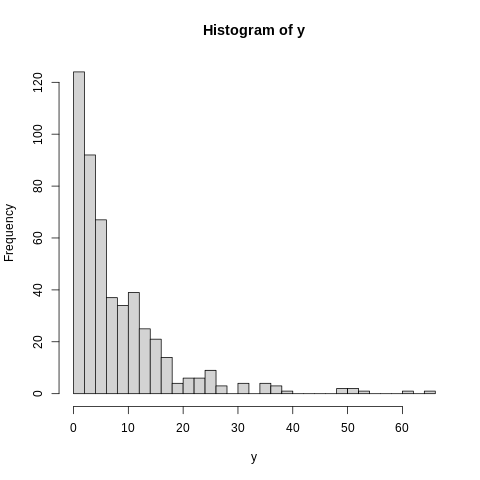

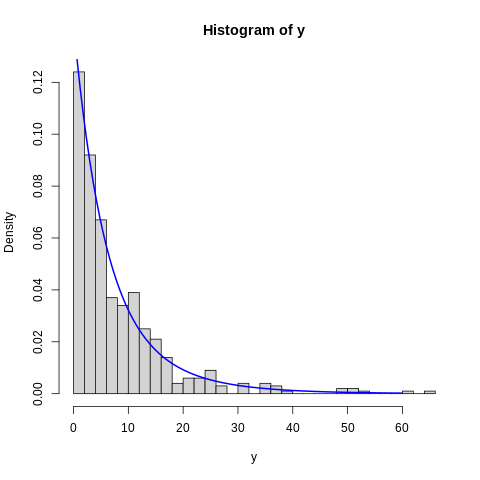

In [ ]:
%%R -o out
# Algoritmo EM para estimar los parámetros de una mezcla de exponenciales

n <- 500
p <- 1/2
l1 <- 1/5
l2  <- 1/10
z <- rbinom(n,1,p)
y <- ifelse(z==1,rexp(sum(z==1),l1),rexp(sum(z!=1),l2))
hist(y,breaks=30)

mix <- function(x,l1,l2,p)
{
    p*dexp(x,l1)+(1-p)*dexp(x,l2)
}

EMmixexp <- function(y,l10,l20,p0,tol=0.0001,maxit=100){
n <-length(y)
pold <- p0
l1old <- l10
l2old <-l20
iter <- 0
change <- 1
while (change>tol&&iter<=maxit){
    num <- pold*dexp(y,l1old)
    den <- num+(1-pold)*dexp(y,l2old)
    pw <- num/den
    sumpw <- sum(pw)
    qw <- 1-pw
    pnew <- sumpw/n
    l1new <- sumpw/(y%*%pw)
    l2new <- (n-sumpw)/(y%*%qw)
    change <- max(abs(c(pnew-pold,l1new-l1old,l2new-l2old)))
    pold <- pnew
    l1old <- l1new
    l2old <- l2new
    iter <-iter+1
}
return(list(l1hat=l1new,l2hat=l2new,phat=pnew))
}

out <- EMmixexp(y,l10=1/5,l20=1/10,p0=1/2,tol=0.0001,maxit=100)
hist(y,breaks=30,freq=F)
curve(mix(x,out$l1hat,out$l2hat,out$phat),0,60,add=T,col="blue",lwd=2)
out

## Datos exponciales censurados

Suponer tiempos de supervivencia $x_1,\ldots,x_n\sim Exp(\lambda)$. Sin embargo, no se observan todos los tiempos de supervivencia porque algunos están censurados en los tiempos $c_1,\ldots,c_n$. Dado que los tiempos de censura son conocidos, lo que en realidad se observa son los datos $\left(\min\left(y_1,c_1\right),\delta_1\right),\ldots,\left(\min\left(y_n,c_n\right),\delta_n\right)$, donde $\delta_i=1$ si $y_i\leq c_i$ y $\delta_i=0$ si $y_i$ está censurado en el tiempo $c_i$.
La densidad de los datos completos es la distribución exponencial con parámetro $\lambda$,
$$
g(x_1,\ldots,x_n\mid\lambda)=\prod_{i=1}^n\lambda\exp\left(-\lambda x_i\right).
$$
La función de verosimilitud dados los datos observados es:
$$
f(\mathbf{y}\mid\lambda,\mathbf{c})=\prod_{i=1}^nExp(y_i\mid\lambda)^{\delta_i}(1-F(c_i\mid\lambda))^{1-\delta_i}=\prod_{i=1}^n\lambda^{\delta_i}\exp\left(-\lambda\delta_iy_i+(1-\delta_i)c_i\right)
$$
En el paso E se calcula
$$
Q\left(\lambda\mid\lambda_0\right)=\mathbb{E}\left[\log g(x_1,\ldots,x_n\mid\lambda)\mid \mathbf{y},\lambda_0\right]
$$
Se pueden clasificar los datos en aquellos que observamos completamente ($\delta_i=1$) y aquellos que están censurados ($\delta_i=0$). Para los datos censurados el tiempo completo de supervivencia está "perdido", de modo que se denota el tiempo completo de supervivencia como $z_i$. Así, la función de verosimiltud para los datos completos es
$$
g(\mathbf{y},\mathbf{z}\mid\lambda)=\prod_{i=1}^nExp\left(\delta_iy_i+(1-\delta_i)z_i\mid\lambda\right)=\lambda^n\exp{\left[-\lambda\sum_{i=1}^n\delta_iy_i+(1-\delta_i)z_i\right]}.
$$
Dado lo anterior, la función $Q$ es
$$
Q\left(\lambda\mid\lambda_0\right)=\mathbb{E}\left[n\log\lambda-\lambda\left[\sum_{i=1}^n\delta_iy_i+(1-\delta_i)z_i\right]\Big{\vert}\mathbf{y},\lambda_0\right].
$$
Dado que se asume la exponencialidad de los datos, se puede utilizar la propiedad de *pérdida de memoria* de la distribución exponencial. Esto es, dado que se sobrevive hasta el tiempo $c_i$, el tiempo esperado de sobrevivencia a partir de ese tiempo es $1/\lambda$. Dado que no se conoce aun $\lambda$ se puede utilizar la mejor estimación actual $\lambda_0$. Así, en el paso E se tiene
$$
Q\left(\lambda\mid\lambda_0\right)=n\log\lambda-\lambda\left[\sum_{i=1}^n\delta_iy_i+(1-\delta_i)(c_i+\lambda_0^{-1})\right].
$$
El nuevo valor de $\lambda$ que maximiza $Q$ (paso M) es
$$
\hat{\lambda}=n\left[\sum_{i=1}^n\delta_iy_i+(1-\delta_i)(c_i+\lambda_0^{-1})\right]^{-1}
$$
y se actualiza $\lambda_0=\hat{\lambda}$.

**Tarea**: Los datos siguientes son los tiempos de sobrevivencia (meses) de pacientes con cierta enfermedad
 $$3, 5, 6^∗, 8, 10^∗, 11^∗, 15, 2^∗, 22, 23, 27^∗, 29, 32, 35, 40, 26, 28, 3^∗, 21, 24^∗$$
donde $^*$ indica datos censurados por la derecha.
- Programar el algoritmo EM para estimar con estos datos el tiempo promedio de supervivencia.

## Convergencia del algoritmo EM

### Desigualdad de Jensen

Para una función convexa $f$, $\mathbb{E}\left[f(x)\right]\geq f(\mathbb{E}\left[x\right])$. Voltear el signo para una función cóncava.

Una función es convexa si $f''(x)\geq0$ en todo su dominio Por ejemplo, si $f(x)=log(x)$, $f''(x)=-1/x^2$, de modo que la función $log$ es cóncava para $x\in\left(0,\infty \right]$. Abajo una ilustración de la desiguadad de Jensen

In [ ]:
import rpy2.ipython
%reload_ext rpy2.ipython

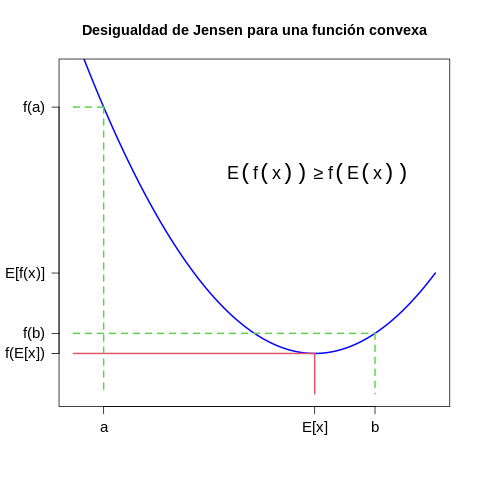

In [ ]:
%%R
# Sea f(x)=0.5+(x-2)^2
# Suponer x~N(2,1) => E(X)=2, E((X-2)^2)=1, E(f(x))=1.5, f(E(x))=0.5
f <- function(x) 0.5+(x-2)^2
a <- 0.25; b <-2.5;
curve(f(x),0,3,
      main="Desigualdad de Jensen para una función convexa",
      xlab="",ylab="",lwd=2,col="blue",ylim=c(0,4),
      xaxt="n",yaxt="n")
segments(0,0.5,2,0.5,col=2,lwd=2)
segments(2,0,2,0.5,col=2,lwd=2)
segments(0,f(a),a,f(a),col=3,lwd=2,lty=2)
segments(a,f(a),a,0,col=3,lwd=2,lty=2)
segments(0,f(b),b,f(b),col=3,lwd=2,lty=2)
segments(b,f(b),b,0,col=3,lwd=2,lty=2)
axis(1,c(a,2,b),labels=c("a","E[x]","b"),cex.axis=1.25)
axis(2,c(0.5,f(b),1.5,f(a)),labels=c("f(E[x])","f(b)","E[f(x)]","f(a)"),las=2,cex.axis=1.25)
legend(1,3,legend=expression(E(f(x))>=f(E(x))),bty="n",cex=1.5)





En el diagrama anterior se observa que se tiene una igualdad cuando la función $f(x)$ es constante.

### Información incompleta
En los ejemplos anteriores la dificultad en la estimación de $\theta$ se debe a que no se tiene la información completa; esto es, se observa $y$ pero hay información faltante $z$. La idea básica tras el algoritmo EM es simplemente iniciar con una aproximación de $\theta$, luego calcular el valor esperado de la información faltante dado lo que se ha observado y el valor actual de $\theta$, luego actualizar el valor de $\theta$ utilizando la información completada con la esperanza de la información faltante, y repetir hasta obtener la convergencia.

Considérese la función de log-verosimilitud como una curva (superficie). Se encuentra otra función $Q$ de $\theta$ que es una cota inferior de la log-verosimilitud en algún valor de $\theta$ (Paso E). A continuación, se encuentra el valor $\theta$ que maximiza esta función (Paso M). Ahora se encuetra otra función de $\theta$ que es un cota inferior de la log-verosmiltud en nuevo $\theta$. El procedimieto se repite hasta la convergencia, en este punto los máximos de la cota inferior y la log-verosimilitud son los mismos [ver link](http://mcb111.org/w07/nbt1406-S1.pdf).
Entonces, la parte fundamental del algoritmo es encontrar las cotas de la log-verosimiltud, esto require el uso de la desigualdad de Jensen.
![Screen%20Shot%202020-03-18%20at%2000.41.35.png](attachment:Screen%20Shot%202020-03-18%20at%2000.41.35.png)
Una de las cualidades positivas del algoritmo EM es que es muy estable. A diferencia del algoritmo de Newton, donde cada iteración puede o no estar más cerca del valor óptimo, cada iteración del algoritmo EM está diseñada para incrmentar la log-verosimilitud. Esta es la propiedad de ascenso del algoritmo EM. Sin embargo, esta estabilidad tiene un precio: la tasa de convergencia del algoritmo EM es lineal (mientras que el algoritmo de Newton es cuadrática).

### Función minorante
En el algoritmo EM en lugar de maximizar directamente la log-verosimiltud, que es difícil de evaluar, se construye una función minorante y optimiza esa función.

Una función g es minorante de $f$ sobre $\mathcal{X}$ en $y$ si

1\. $g(x)\leq f(x)$ $\forall x \in\mathcal{X}$
2\. $g(y)=f(y)$

En el algoritmo EM, $Q(\theta\mid\theta_0)$ es una función minorante. Los beneficios de este enfoque son

1\. $Q(\theta\mid\theta_0)$ es una función más fácil de optimizar

2\. Dado que $Q(\theta\mid\theta_0)$ es minorante de $l(\theta\mid y)$, la maximización de ésta garantiza que se
incremente $l(\theta\mid y)$. Esto se debe a que si $\theta_n$ es la estimación actual de $\theta$ y $Q(\theta\mid\theta_n)$ es minorante de $l(\theta\mid y)$ en $\theta_n$, entonces se tiene que
$$
l(\theta_{n+1}\mid y)\geq  Q(\theta_{n+1}\mid\theta_{n})\geq Q(\theta_{n}\mid\theta_{n})=l(\theta_{n}\mid y).
$$

### Explicación del algoritmo EM

La log-verosimilitud es
$$
\log f(y\mid\theta)=\log\int g(y,z\mid\theta)dz.
$$
Si $\theta_0$ es el estimador actual de $\theta$,
\begin{eqnarray}
\log f(y\mid\theta)-\log f(y\mid\theta_0)&=&\log\int g(y,z\mid\theta)dz-\log\int g(y,z\mid\theta_0)dz\\
&=&\log\frac{\int g(y,z\mid\theta)dz}{\int g(y,z\mid\theta_0)dz}\\
&=&\log\frac{\int g(y,z\mid\theta_0)\frac{g(y,z\mid\theta)}{g(y,z\mid\theta_0)}dz}{\int g(y,z\mid\theta_0)dz}.
\end{eqnarray}
Por definición, la distribución condicional de los datos faltantes es
$$
h(z\mid y,\theta)= \frac{g(y,z\mid\theta)}{f(y\mid\theta)}=\frac{g(y,z\mid\theta)}{\int g(y,z\mid\theta)dz}
$$
se puede escribir
\begin{eqnarray}
\log f(y\mid\theta)-\log f(y\mid\theta_0)&=&\log \int h(z\mid y,\theta_0)\frac{g(y,z\mid\theta)}{g(y,z\mid\theta_0)}dz\\
&=&\log\mathbb{E}\left[\frac{g(y,z\mid\theta)}{g(y,z\mid\theta_0)}\Big\vert y,\theta_0\right]
\end{eqnarray}



Dado que la función $\log$ es concava, por la desigualdad de Jensen se tiene que
$$
\log\mathbb{E}\left[\frac{g(y,z\mid\theta)}{g(y,z\mid\theta_0)}\Big\vert y,\theta_0\right]\geq\mathbb{E}\left[\log\frac{g(y,z\mid\theta)}{g(y,z\mid\theta_0)}\Big\vert y,\theta_0\right],
$$
de lo que sigue que
\begin{eqnarray}
\log f(y\mid\theta)&\geq&\log f(y\mid\theta_0)+\mathbb{E}\left[\log g(y,z\mid\theta)\mid y,\theta_0\right]-\mathbb{E}\left[\log g(y,z\mid\theta_0)\mid y,\theta_0\right]\\
&\quad=&\log f(y\mid\theta_0)+Q(\theta\mid\theta_0)-Q(\theta_0\mid\theta_0)
\end{eqnarray}

El lado derecho de la desigualdad anterior, en el que sólo el segundo término es función de $\theta$, es la función minorante. Con $\theta=\theta_0$ se tiene que la función minorante es igual a $\log f(y\mid\theta_0)$.